In [14]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
import os
inputpath = str('/content/drive/My Drive/Colab Notebooks/video.mp4')                              #Path to the video you want to be processed
storagepath = str('/content/drive/My Drive/Colab Notebooks/Frames')
outputpath = str('/content/drive/My Drive/Colab Notebooks/finalGripper')                                                      #make a folder for storing all the frames after Instance Segmentation
os.mkdir(outputpath)
os.mkdir(storagepath)       
print(inputpath)
print(storagepath)

FileExistsError: ignored

In [2]:
!pip install -U torch torchvision
import torch, torchvision
torch.__version__
!pip install git+https://github.com/facebookresearch/fvcore.git
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.4.0+cu100)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.5.0+cu100)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-i9twr2ir
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-i9twr2ir
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=42662 sha256=bc5d392658b8f08a090cbb990736cfcab9d2cce1dcf4220e02d5bf05940ba633
  Stored in directory: /tmp/pip-ephem-wheel-cache-c5g985u7/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
Successfully built fvcore
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: torch==1.4+cu100 in /usr/local/lib/python3.6/dist-packages (1.4.0+cu100)
Requirement already up-to-date: torchvision==0.5+cu100 in /usr/local/lib/python3.6/dist-packages (0.5.0+cu100)
  Cloning https://github.c

In [0]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/detectron2_repo
  Found existing installation: detectron2 0.1.1
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2


In [3]:
# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
     |████████████████████████████████| 6.2MB 803kB/s 


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow

Processing the video! Here is a frame:


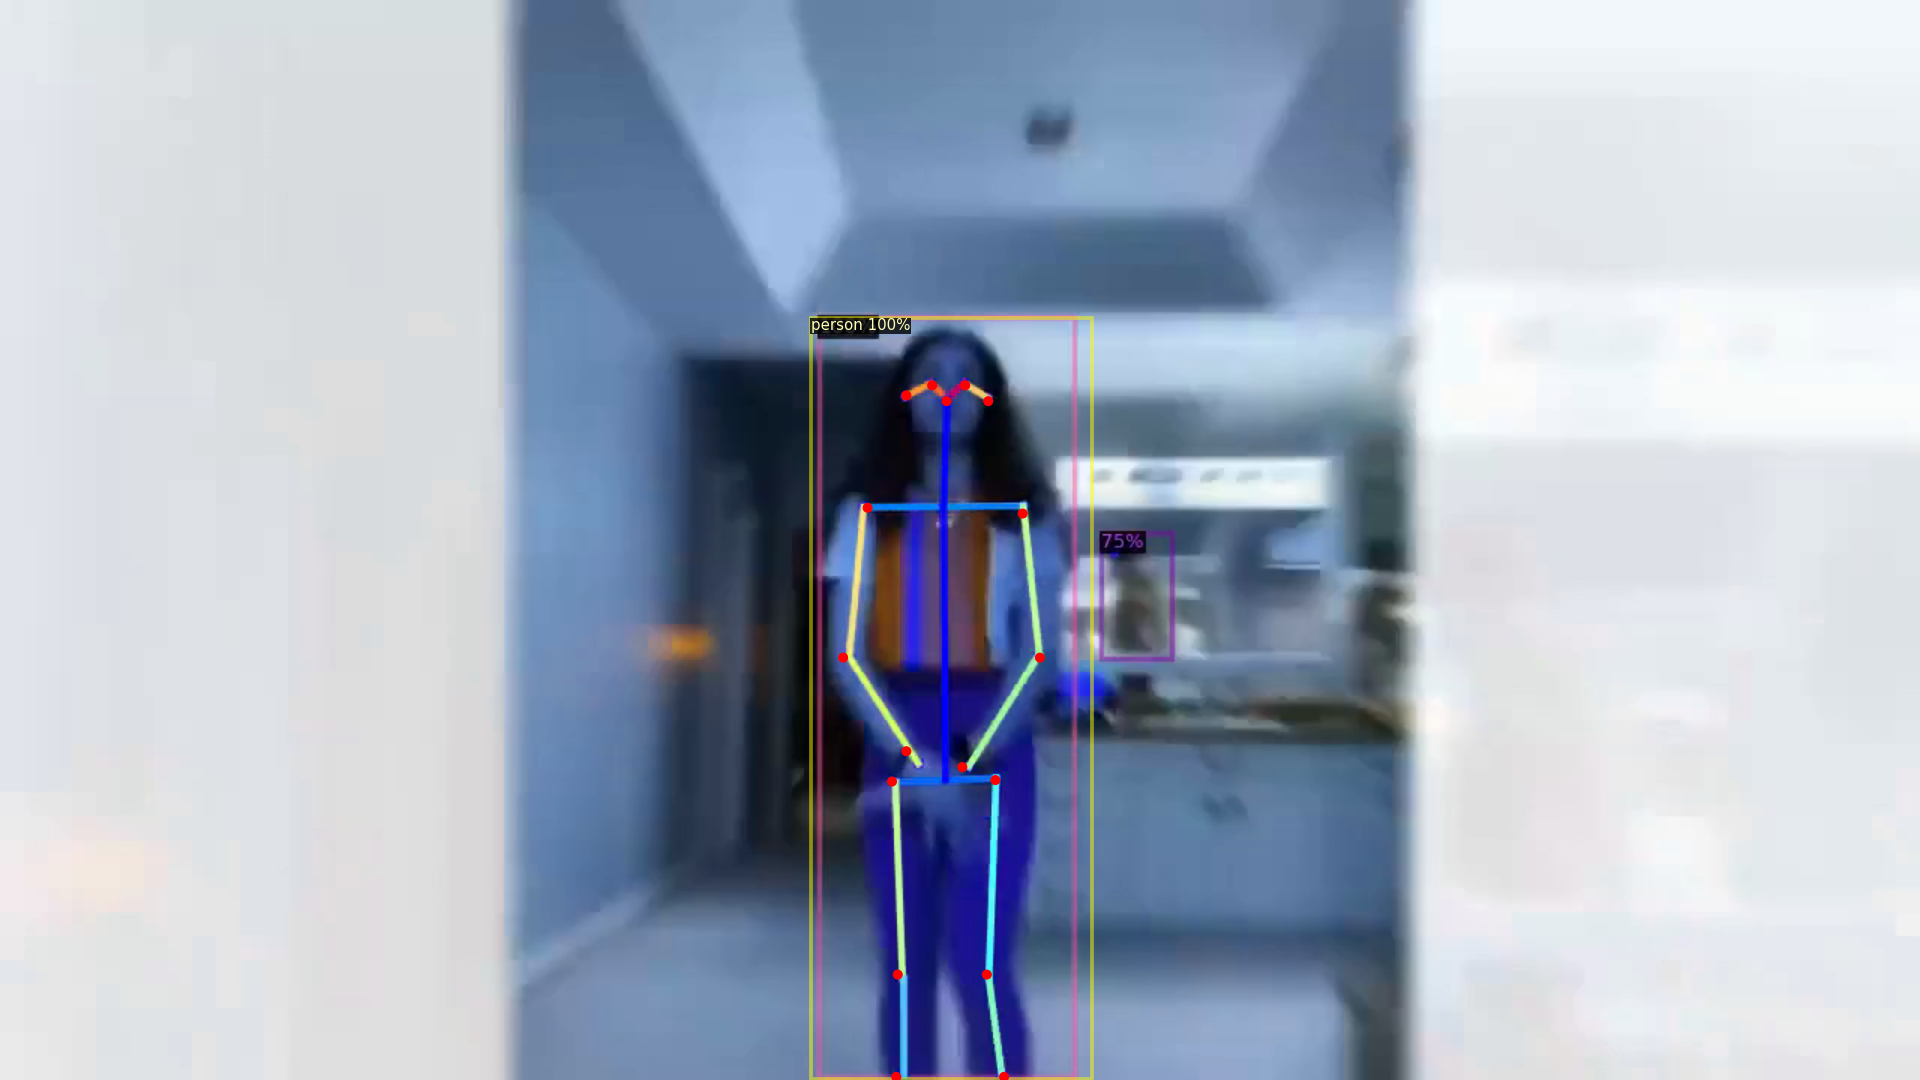

Done


In [8]:
from detectron2.utils.visualizer import ColorMode

import numpy as np

cap = cv2.VideoCapture('video.mp4')
if (cap.isOpened()== False): 
  print("Error opening video stream or file")


cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
#cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
                                     # set threshold for this model
#cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
predictor = DefaultPredictor(cfg)

i=0
while(i<900):        #Video with up to 900 frames gets segmented into each frame
  ret, frame = cap.read()
  if ret == True:
  
    outputs = predictor(frame)
    
    v = Visualizer(frame, MetadataCatalog.get("coco_2017_val"), scale=1.5)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    v = v.get_image()[:, :, ::-1]
    cv2.imwrite(storagepath + '/result_%04i.jpg' %i, v )
    i+=1
    if i == 3:
      print("Processing the video! Here is a frame:")
      cv2_imshow(v)
    
  # Break the loop
  else:
    break 
 
# When everything done, release the video capture and video write objects
cap.release()
# Closes all the frames
cv2.destroyAllWindows()
print('Done')

In [9]:
outputs["instances"].pred_keypoints

tensor([[[5.9971e+02, 2.4765e+02, 9.2389e-01],
         [6.1696e+02, 2.3325e+02, 8.7794e-01],
         [5.7575e+02, 2.2845e+02, 8.7025e-01],
         [6.3805e+02, 2.6205e+02, 6.1665e-01],
         [5.5275e+02, 2.5725e+02, 8.9548e-01],
         [6.7542e+02, 3.4460e+02, 7.5238e-02],
         [5.0674e+02, 3.4172e+02, 1.4703e-01],
         [7.5402e+02, 3.5324e+02, 3.4669e-01],
         [4.5882e+02, 4.3674e+02, 3.3116e-02],
         [5.3358e+02, 3.5228e+02, 1.1913e-01],
         [4.7511e+02, 3.5324e+02, 1.5443e-01],
         [6.4763e+02, 6.1336e+02, 4.5419e-02],
         [5.2304e+02, 6.3447e+02, 5.7889e-02],
         [7.5402e+02, 3.5228e+02, 5.2278e-02],
         [5.6904e+02, 4.2139e+02, 3.6327e-02],
         [5.3933e+02, 3.5228e+02, 4.6063e-02],
         [5.8437e+02, 5.7592e+02, 2.1957e-02]],

        [[5.9915e+02, 2.5304e+02, 1.8287e-01],
         [6.1634e+02, 2.3097e+02, 2.0882e-01],
         [5.7624e+02, 2.2522e+02, 2.9654e-01],
         [6.3639e+02, 2.5784e+02, 2.5948e-01],
         [5

In [11]:
!git push

fatal: not a git repository (or any of the parent directories): .git
